<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
data  = pd.read_csv("/content/1. Regression - Module - (Housing Prices).csv")

**DATA PREPROCESSING OF DEPENDENT VARIABLE**

In [88]:
data["Sale Price"].describe() # we can see we have missing values too!

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [89]:
q1 = data["Sale Price"].quantile(0.25)
q3 = data["Sale Price"].quantile(0.75)

In [90]:
iqr = q3-q1
iqr

323050.0

In [91]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print(upper_limit," ", lower_limit)

1129575.0   -162625.0


In [92]:
data.describe() # taking a look at the whole table different parameters calculation.

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [93]:
# treatement of outliers using imputing technique, which invloves replacing of outliers by maximum or minimum values
# below is the code for that
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  elif value < lower_limit:
    return lower_limit
  else:
    return value

In [94]:
data["Sale Price"] = data["Sale Price"].apply(limit_imputer)

In [95]:
data["Sale Price"].describe() # now here we can see the maximum and minimum values have been taken care of!

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [96]:
# now we will try to see how the missing values are treated
data.dropna(inplace= True , axis=0, subset = ['Sale Price'])

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

Text(0.5, 1.0, 'sale price distribution')

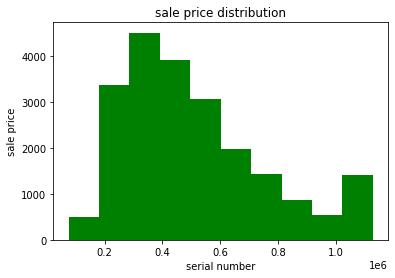

In [98]:
plt.hist(data["Sale Price"], bins = 10, color='green')
plt.xlabel('serial number')
plt.ylabel('sale price')
plt.title('sale price distribution')
# we can clearly see how the graph is skewed towards left, that means there are more less data with more price

In [99]:
data.isnull().sum() # will return the number of missing values in every variable.

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

**DATA PREPROCESSING OF INDEPENDENT VARIABLES**

In [100]:
data.to_csv("data_cleaned.csv") # data_cleaned is the cleaned dataset, we wrote the old file to a new csv file

In [101]:
data2 = pd.read_csv("/content/data_cleaned.csv") # and now we read the new cleaned file using the read_csv function

In [102]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 21609 non-null  int64  
 1   ID                                         21609 non-null  int64  
 2   Date House was Sold                        21609 non-null  object 
 3   Sale Price                                 21609 non-null  float64
 4   No of Bedrooms                             21609 non-null  int64  
 5   No of Bathrooms                            21605 non-null  float64
 6   Flat Area (in Sqft)                        21600 non-null  float64
 7   Lot Area (in Sqft)                         21600 non-null  float64
 8   No of Floors                               21609 non-null  float64
 9   Waterfront View                            21609 non-null  object 
 10  No of Times Visited   

In [103]:
data2.isnull().sum()

Unnamed: 0                                   0
ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area afte

In [104]:
numerical_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude','Longitude',
                     'Living Area after Renovation (in Sqft)' ]

In [105]:
from sklearn.impute import  SimpleImputer
imputer =  SimpleImputer(missing_values = np.nan, strategy = 'median')
data2[numerical_columns] = imputer.fit_transform(data2[numerical_columns]) 
# our strategy here was to replace the missing values with media values in case of all numerical variables.

In [106]:
data2.info() # still zipcode has missing values, because it's categorical variable , we will have to deal with it differently

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 21609 non-null  int64  
 1   ID                                         21609 non-null  int64  
 2   Date House was Sold                        21609 non-null  object 
 3   Sale Price                                 21609 non-null  float64
 4   No of Bedrooms                             21609 non-null  int64  
 5   No of Bathrooms                            21609 non-null  float64
 6   Flat Area (in Sqft)                        21609 non-null  float64
 7   Lot Area (in Sqft)                         21609 non-null  float64
 8   No of Floors                               21609 non-null  float64
 9   Waterfront View                            21609 non-null  object 
 10  No of Times Visited   

In [107]:
# as fit transform function takes 2-d array, so we gonna convert this column of zipcode into a 2-d array
column = data2["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

In [108]:
imputer   = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
data2["Zipcode"] = imputer.fit_transform(column)

In [109]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 21609 non-null  int64  
 1   ID                                         21609 non-null  int64  
 2   Date House was Sold                        21609 non-null  object 
 3   Sale Price                                 21609 non-null  float64
 4   No of Bedrooms                             21609 non-null  int64  
 5   No of Bathrooms                            21609 non-null  float64
 6   Flat Area (in Sqft)                        21609 non-null  float64
 7   Lot Area (in Sqft)                         21609 non-null  float64
 8   No of Floors                               21609 non-null  float64
 9   Waterfront View                            21609 non-null  object 
 10  No of Times Visited   

In [110]:
# now we are gonna use the dataset 3 which has been made missing data free by us.
data3 = pd.read_csv("/content/Raw_Housing_Prices3.csv")

In [111]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [112]:
data3["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [113]:
mapping = {'None': "0",
           'Thrice': "3",
           'Four': "4",
           'Twice': "2",
           'Once': "1"}
data3["No of Times Visited"] = data3["No of Times Visited"].map(mapping)

In [114]:
data3["No of Times Visited"].unique() # so here we have no mapped the catergorical variable into integer form.

array(['0', '3', '4', '2', '1'], dtype=object)

In [115]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [116]:
data3["renovated"] = np.where(data3["Renovated Year"], 'yes', 'no')

In [117]:
data3.head(5) # so we have added a new column of whether the house was ever renovated or not!

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,no
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,no
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,no
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,no


In [118]:
data3["year"] = pd.DatetimeIndex(data3["Date House was Sold"]).year

In [119]:
data3.head(5) # so now we have taken out year, this will be further used for building accurate models because no we will take out thr time gap of renovation of each house which will certainly effect the model.

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),renovated,year
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,no,2017
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,yes,2017
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,no,2016
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,no,2017
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,no,2016


In [120]:
data3["years_since_renovation"] = np.where(data3["renovated"]=='yes', abs(data3["year"]-data3["Renovated Year"]), 0)

In [121]:
data3.head(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),renovated,year,years_since_renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,no,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,no,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,no,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,no,2016,0
5,7237550310,14 May 2017,1129575.0,4,4.50,5420.0,101930.0,1.0,No,0,Fair,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930,no,2017,0
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,0,Fair,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819,no,2017,0
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,0,Fair,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711,no,2016,0
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,0,Fair,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113,no,2016,0
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,0,Fair,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570,no,2016,0


In [122]:
# we will only be using "years_since_renovation", so we can drop all the other variables which we used to derive "years_since_renovation" to keep our code tidy.
data3.drop(columns = ['Date House was Sold','Renovated Year','year'], inplace=True)

In [123]:
data3.head(10)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),renovated,years_since_renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,no,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,no,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,no,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,no,0
5,7237550310,1129575.0,4,4.50,5420.0,101930.0,1.0,No,0,Fair,10,3890.0,1530,17,98053.0,47.6561,-122.005,4760.0,101930,no,0
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,No,0,Fair,7,1715.0,0,23,98003.0,47.3097,-122.327,2238.0,6819,no,0
7,2008000270,291850.0,3,1.50,1060.0,9711.0,1.0,No,0,Fair,7,1060.0,0,55,98198.0,47.4095,-122.315,1650.0,9711,no,0
8,2414600126,229500.0,3,1.00,1780.0,7470.0,1.0,No,0,Fair,7,1050.0,730,58,98146.0,47.5123,-122.337,1780.0,8113,no,0
9,3793500160,323000.0,3,2.50,1890.0,6560.0,2.0,No,0,Fair,7,1890.0,0,15,98038.0,47.3684,-122.031,2390.0,7570,no,0


In [124]:
# now we have further refined our data, therefore we will use the refined data now.
data4 = pd.read_csv("/content/Transformed_Housing_Data.csv")

In [125]:
# now we will see the corelation between different variables
data4["Sale Price"].corr(data4["Flat Area (in Sqft)"])

0.6951704258420669

In [126]:
data4.drop(columns = ["ID"]).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158


In [127]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [128]:
# we will be dropping the ID variable as this would not be of much use in model building
data4.drop(columns = 'ID', inplace=True)

In [129]:
data4["Condition of the House"].value_counts() # now we will deal with the categorical variables like which contains value as string.

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

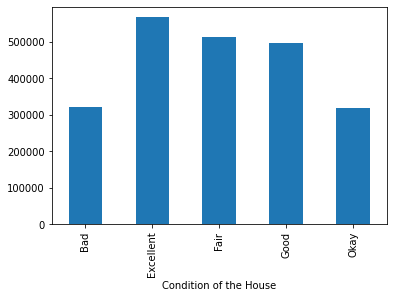

In [130]:
data4.groupby('Condition of the House')['Sale Price'].mean().plot(kind='bar') # seeing the variation of sale price with condition of the house.

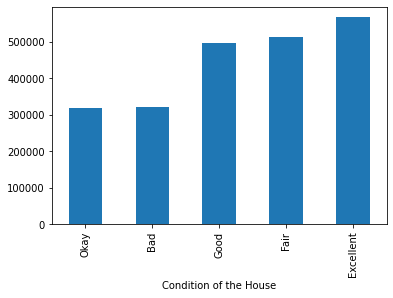

In [131]:
data4.groupby('Condition of the House')['Sale Price'].mean().sort_values( ).plot(kind='bar')

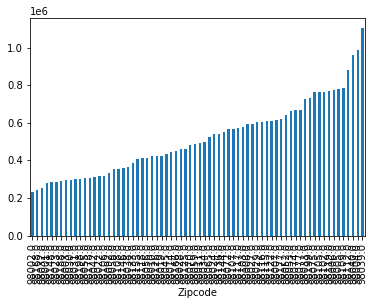

In [132]:
data4.groupby('Zipcode')['Sale Price'].mean().sort_values( ).plot(kind='bar')

In [133]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [134]:
data4 = data4.rename(columns= {'Sale Price':"Sale_Price"})
data4 = data4.rename(columns = {'Condition of the House':"Condition_of_the_House"})
data4 = data4.rename(columns = {'Ever Renovated':"Ever_Renovated"})
data4 = data4.rename(columns = {'Waterfront View':"Waterfront_View"})

In [135]:
data4["Waterfront_View"].unique()

array(['No', 'Yes'], dtype=object)

In [136]:
# now let's apply ANOVA
mod = ols('Sale_Price ~ Condition_of_the_House', data=data4).fit()

In [137]:
ANOVA_TABLE = sm.stats.anova_lm(mod, typ=2)

In [138]:
print(ANOVA_TABLE)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [139]:
mod = ols('Sale_Price ~ Ever_Renovated', data = data4).fit()

In [140]:
sm.stats.anova_lm(mod, typ=2) # we can see that 'p' value is less than 0.05 in every case, therefore we will reject the NULL hypothesis of ANOVA

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [141]:
# encoding process now
data4 = pd.get_dummies(data4, columns = ['Waterfront_View','Ever_Renovated','Condition_of_the_House'], drop_first=True)

In [142]:
data4.head(5)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Waterfront_View_Yes,Ever_Renovated_Yes,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26,0,1,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,0,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,0,1,0,0


In [143]:
# if we have lot of levels of categorical variable, we first 'bin' it, because if we do the dummy variable conversion, there would be lot of dummy variables created, which will be difficult to handle.
zip_table = data4.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price', ascending = True)

In [144]:
zip_table.head() # so we have taken average of sale prices, grouped it with zipcode and made it in ascending order.

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [145]:
zip_table['zipcode_group'] = pd.cut(zip_table['Sale_Price'], bins=10, labels=['zipcode_group_0', 'zipcode_group_1','zipcode_group_2',
                                                                              'zipcode_group_3','zipcode_group_4','zipcode_group_5',
                                                                              'zipcode_group_6','zipcode_group_7','zipcode_group_8',
                                                                              'zipcode_group_9'], include_lowest=True)

In [146]:
zip_table.head()

,Sale_Price,zipcode_group
Zipcode,,
98002.0,234284.035176,zipcode_group_0
98168.0,240328.371747,zipcode_group_0
98032.0,251296.240000,zipcode_group_0
98001.0,280804.690608,zipcode_group_0
98148.0,284908.596491,zipcode_group_0


In [147]:
zip_table = zip_table.drop(columns='Sale_Price')

In [148]:
zip_table.head(10)

,zipcode_group
Zipcode,
98002.0,zipcode_group_0
98168.0,zipcode_group_0
98032.0,zipcode_group_0
98001.0,zipcode_group_0
98148.0,zipcode_group_0
98023.0,zipcode_group_0
98188.0,zipcode_group_0
98003.0,zipcode_group_0
98030.0,zipcode_group_0


In [149]:
# now we need to merge zip_table with the original table and for this purpose we will use pandas library function called 'merge'
data4 = pd.merge(data4,zip_table,left_on='Zipcode', how='left', right_index=True)

In [150]:
data4.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Waterfront_View_Yes,Ever_Renovated_Yes,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,zipcode_group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,0,1,0,0,zipcode_group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26,0,1,0,1,0,0,zipcode_group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,0,1,0,0,zipcode_group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,0,0,1,0,0,0,zipcode_group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,0,1,0,0,zipcode_group_4


In [151]:
data4 = pd.get_dummies(data4, columns=['zipcode_group'], drop_first=True) # first we converted zipcode to categorical variable and then we encoded it here in this cell.

In [152]:
data4.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Waterfront_View_Yes,Ever_Renovated_Yes,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [153]:
data5 = pd.read_csv("/content/Transformed_Housing_Data2(1).csv")

In [154]:
data5.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [155]:
y = data5.iloc[:,0]

In [156]:
x = data5.iloc[:,1:31]

In [157]:
x.head(5)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [158]:
y.head(5)

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [159]:
# now we will split out dataset for training and testing purpose for the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [160]:
x_train

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
10390,2,3.25,1840.0,1500.0,3.0,0,8,1840.0,0,17,47.6595,-122.354,1910.0,2500,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
19845,4,2.50,3250.0,4500.0,2.0,0,8,3250.0,0,9,47.4944,-122.149,3030.0,4518,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3012,3,1.50,1070.0,6601.0,1.0,0,6,1070.0,0,33,47.3115,-122.209,1030.0,6614,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20690,3,2.50,1600.0,3073.0,3.0,0,8,1600.0,0,9,47.5934,-122.298,1130.0,2921,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
13417,2,2.25,2950.0,15593.0,1.0,0,8,1560.0,1390,76,47.6209,-122.236,2060.0,19855,31,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15648,3,1.00,1590.0,11200.0,1.0,0,7,1590.0,0,57,47.2894,-122.188,1560.0,9750,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
19086,4,2.50,3780.0,23623.0,2.0,0,9,3780.0,0,21,47.5590,-122.118,3370.0,10210,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
20141,4,3.50,3130.0,5000.0,3.0,0,10,3130.0,0,4,47.5656,-122.403,1950.0,5152,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
491,5,2.50,2820.0,14062.0,2.0,0,7,2380.0,440,58,47.7081,-122.215,1910.0,10392,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [161]:
y_train

10390     601450.0
19845     519000.0
3012      219950.0
20690     502000.0
13417    1129575.0
           ...    
15648     247200.0
19086     962800.0
20141    1010000.0
491       669950.0
12433     340000.0
Name: Sale_Price, Length: 15126, dtype: float64

In [162]:
x_train.shape

(15126, 30)

In [163]:
x_test.shape

(6483, 30)

In [164]:
y_train.shape

(15126,)

In [165]:
y_test.shape

(6483,)

In [166]:
s = pd.Series(data= [10,5,6,2,3,1,4,8,9,7], index = [49,48,47,46,45,1,2,3,4,5])
s
# loc function only takes index and return the data at that particular index

49    10
48     5
47     6
46     2
45     3
1      1
2      4
3      8
4      9
5      7
dtype: int64

In [167]:
s.loc[3]

8

In [168]:
# now we will do feature scaling so as to avoid the preference given to any specific data by the model
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [169]:
scale.fit_transform(x_train)

array([[-1.45750913,  1.47858693, -0.25936645, ..., -0.10787604,
        -0.16733363, -0.05149238],
       [ 0.67287528,  0.50249886,  1.28975216, ..., -0.10787604,
        -0.16733363, -0.05149238],
       [-0.39231692, -0.79895189, -1.10533903, ..., -0.10787604,
        -0.16733363, -0.05149238],
       ...,
       [ 0.67287528,  1.80394961,  1.15791228, ..., -0.10787604,
        -0.16733363, -0.05149238],
       [ 1.73806749,  0.50249886,  0.81732592, ..., -0.10787604,
        -0.16733363, -0.05149238],
       [-0.39231692, -1.44967727, -0.25936645, ..., -0.10787604,
        -0.16733363, -0.05149238]])

In [170]:
scale.fit_transform(x_test)

array([[ 0.68607705,  0.49530656,  0.80180694, ..., -0.12194931,
        -0.17234093, -0.03930495],
       [ 0.68607705,  0.49530656,  0.47095138, ..., -0.12194931,
        -0.17234093, -0.03930495],
       [-0.41432808, -1.44257662, -1.19399918, ..., -0.12194931,
        -0.17234093, -0.03930495],
       ...,
       [-0.41432808,  0.17232603, -0.31883286, ..., -0.12194931,
        -0.17234093, -0.03930495],
       [-0.41432808,  0.49530656,  0.60969726, ..., -0.12194931,
        -0.17234093, -0.03930495],
       [-0.41432808, -1.44257662, -0.9485257 , ..., -0.12194931,
        -0.17234093, -0.03930495]])

In [171]:
#  now we are ready for model building. see you in a new notebook, byee..